In [1]:
# ---- importing functions ----
pipeline_dir = 'C:/Users/ys2605/Desktop/stuff/slow_dynamics_analysis'    # edit this 

import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

sys.path.append(pipeline_dir + '/functions')
from f_sd_utils import f_get_fnames_from_dir, f_load_firing_rates, f_get_frames, f_get_stim_trig_resp
from f_sd_decoder import f_run_binwise_dec, f_plot_binwise_dec, f_shuffle_trials
from f_sd_utils import f_save_fig

In [2]:
# ---- loading mismatch datasets ----
data_dir = 'F:/AC_data/caiman_data_missmatch/'   # edit this 
# search for files to load using tags in the filename
flist = f_get_fnames_from_dir(data_dir, ext_list = ['mat'], tags=['ammn', '_processed_data'])  # 'results_cnmf_sort'

firing_rates_all = []
trial_types_all = []
stim_times_all = []
mmn_ori_all = []
volume_period_all = []

# here you can limit how many datasets to analyze; 
for n_fl in range(len(flist)):   # len(flist) or some number
    # loading raw firing rates, trial types, and stimuli times
    # here you can indicate to use oasis deconvolution or smoothdfdt
    data_out = f_load_firing_rates(fpath=data_dir + flist[n_fl], deconvolution='oasis', smooth_std_duration=0)     # oasis, smoothdfdt; normally smooth with 0.1sec 
    
    # extract data and parameters we will use from each dataset
    if data_out['files_loaded']:
        firing_rates_all.append(data_out['firing_rates'])
        trial_types_all.append(data_out['trial_types'])
        stim_times_all.append(data_out['stim_times'])
        mmn_ori_all.append(data_out['MMN_ori'])
        volume_period_all.append(data_out['volume_period'])

M6_im7_AAF_ammn1_5_15_20_ data file with results_cnmf_sort.mat tag not found, skipping
M6_im8_AAF_ammn2_5_15_20_ data file with results_cnmf_sort.mat tag not found, skipping


In [3]:
# ---- extracting trials using stimulus times ----
# trial window to extract is indicated in seconds, also frame rate needs to be provided (assuming all datasets have similar frame rate)
trial_frames, plot_t = f_get_frames(trial_win = [-1, 3], frame_rate=1000/np.mean(volume_period_all))

# do the trial extraction for all datasets
stim_trig_resp_all = []
for n_fl in range(len(firing_rates_all)):  
    # computing stimulus triggered average (neurons, frames, trials)
    stim_trig_resp = f_get_stim_trig_resp(firing_rates_all[n_fl], stim_times_all[n_fl], trial_frames = trial_frames)
    stim_trig_resp_all.append(stim_trig_resp)

In [4]:
# ---- training binwise decoder diagonally ----
train_test_method = 'diag'    # training options: full, diag, train_at_stim, test_at_stim
plot_legend = ('Data', 'Shuff')

dec_data_all = []
for n_fl in range(len(stim_trig_resp_all)):
    print('Training dataset %d/%d' % (n_fl+1, len(stim_trig_resp_all)))
    stim_trig_resp = stim_trig_resp_all[n_fl]
    trial_types = trial_types_all[n_fl]
    trial_types_use = trial_types<=10
    
    X_all = [stim_trig_resp[:,:,trial_types_use], stim_trig_resp[:,:,trial_types_use]]
    # to creatae shuffled version we shuffle the trial types
    Y_all = [trial_types[trial_types_use], f_shuffle_trials(trial_types[trial_types_use])]
    
    dec_data = f_run_binwise_dec(X_all, Y_all, train_test_method=train_test_method, pca_var_frac = 1, num_cv=5, normalize = False, add_noise_sigma=1e-5, get_train_coeffs=True)
    dec_data_all.append(dec_data)

Training dataset 1/58
Training dataset 2/58
Training dataset 3/58
Training dataset 4/58
Training dataset 5/58
Training dataset 6/58
Training dataset 7/58
Training dataset 8/58
Training dataset 9/58
Training dataset 10/58
Training dataset 11/58
Training dataset 12/58
Training dataset 13/58
Training dataset 14/58
Training dataset 15/58
Training dataset 16/58
Training dataset 17/58
Training dataset 18/58
Training dataset 19/58
Training dataset 20/58
Training dataset 21/58
Training dataset 22/58
Training dataset 23/58
Training dataset 24/58
Training dataset 25/58
Training dataset 26/58
Training dataset 27/58
Training dataset 28/58
Training dataset 29/58
Training dataset 30/58
Training dataset 31/58
Training dataset 32/58
Training dataset 33/58
Training dataset 34/58
Training dataset 35/58
Training dataset 36/58
Training dataset 37/58
Training dataset 38/58
Training dataset 39/58
Training dataset 40/58
Training dataset 41/58
Training dataset 42/58
Training dataset 43/58
Training dataset 44/

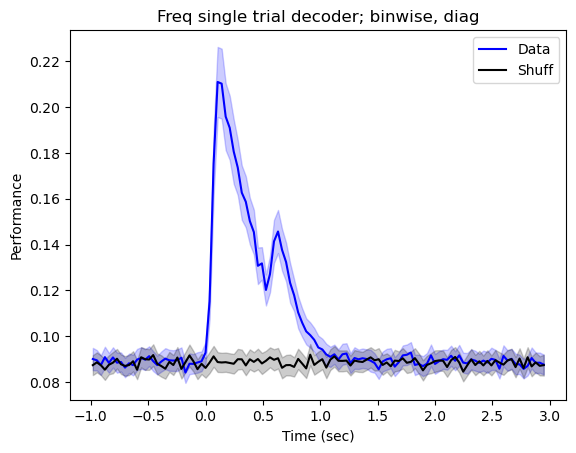

In [5]:
# ---- plotting diagonal decoder results ----
figs_diag = f_plot_binwise_dec(dec_data_all, plot_t=plot_t, plot_legend=plot_legend, plot_start=-1, plot_end=3, title_tag='Freq single trial decoder')

In [6]:
# ---- save figure ----
fig_dir = 'C:/Users/ys2605/Desktop/stuff/papers/AC_paper_protocol/figures/python'    # edit this
save_figs = False  # can turn on or off to save figure or not
if save_figs:    
    f_save_fig(figs_diag['diag_mean'], path=fig_dir, name_tag='')

In [7]:
# ---- analyze the full decoding space ----
train_test_method = 'full'          # full, diag, train_at_stim, test_at_stim
n_fl = 0        # dataset to analyze

trial_types_use = trial_types_all[n_fl]<=10

X_all = [stim_trig_resp_all[n_fl][:,:,trial_types_use], stim_trig_resp_all[n_fl][:,:,trial_types_use]]
Y_all = [trial_types_all[n_fl][trial_types_use], f_shuffle_trials(trial_types_all[n_fl][trial_types_use])]
plot_legend = ('Data', 'Shuff')

dec_data_full = f_run_binwise_dec(X_all, Y_all, train_test_method=train_test_method, pca_var_frac = 1, normalize = False, add_noise_sigma=1e-5, log=True)


dset 1 of 2; train bin 0/114
dset 1 of 2; train bin 1/114
dset 1 of 2; train bin 2/114
dset 1 of 2; train bin 3/114
dset 1 of 2; train bin 4/114
dset 1 of 2; train bin 5/114
dset 1 of 2; train bin 6/114
dset 1 of 2; train bin 7/114
dset 1 of 2; train bin 8/114
dset 1 of 2; train bin 9/114
dset 1 of 2; train bin 10/114
dset 1 of 2; train bin 11/114
dset 1 of 2; train bin 12/114
dset 1 of 2; train bin 13/114
dset 1 of 2; train bin 14/114
dset 1 of 2; train bin 15/114
dset 1 of 2; train bin 16/114
dset 1 of 2; train bin 17/114
dset 1 of 2; train bin 18/114
dset 1 of 2; train bin 19/114
dset 1 of 2; train bin 20/114
dset 1 of 2; train bin 21/114
dset 1 of 2; train bin 22/114
dset 1 of 2; train bin 23/114
dset 1 of 2; train bin 24/114
dset 1 of 2; train bin 25/114
dset 1 of 2; train bin 26/114
dset 1 of 2; train bin 27/114
dset 1 of 2; train bin 28/114
dset 1 of 2; train bin 29/114
dset 1 of 2; train bin 30/114
dset 1 of 2; train bin 31/114
dset 1 of 2; train bin 32/114
dset 1 of 2; train b

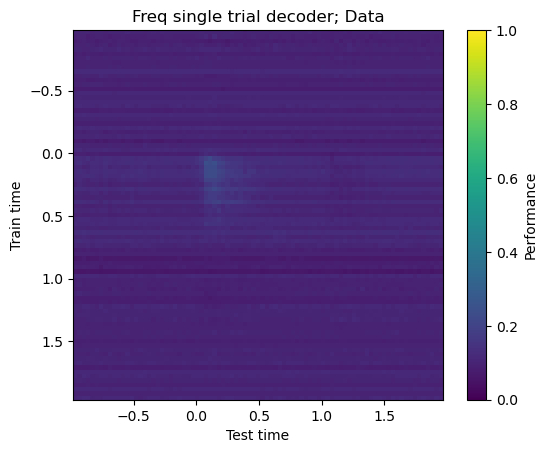

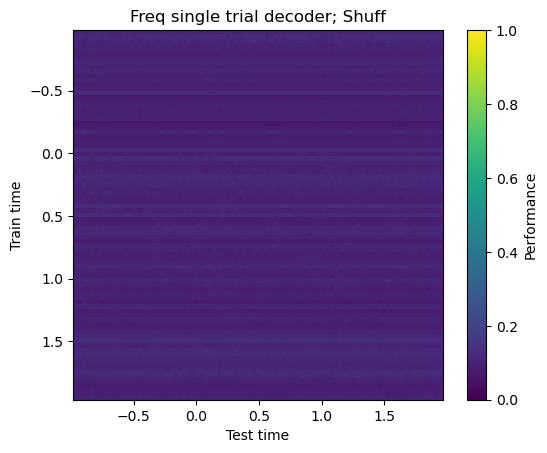

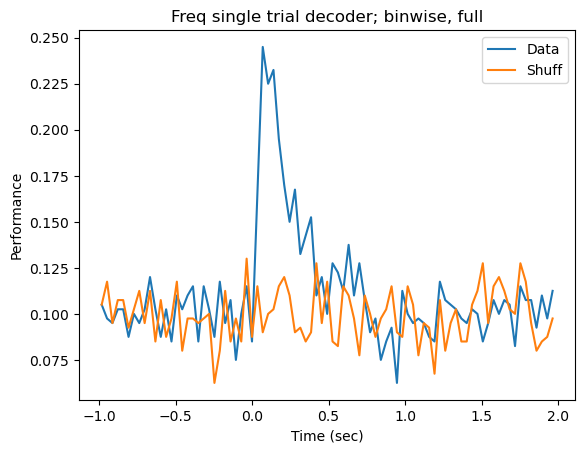

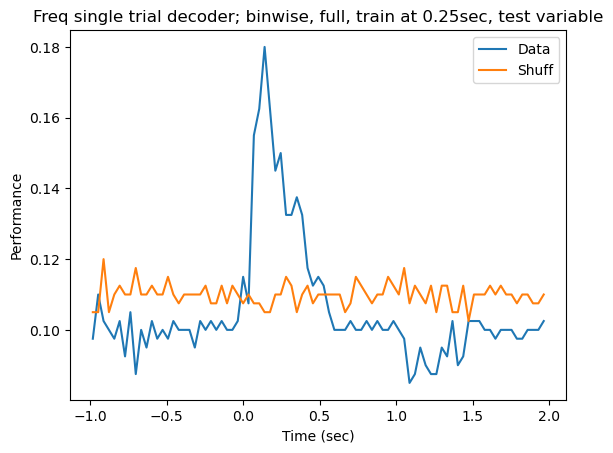

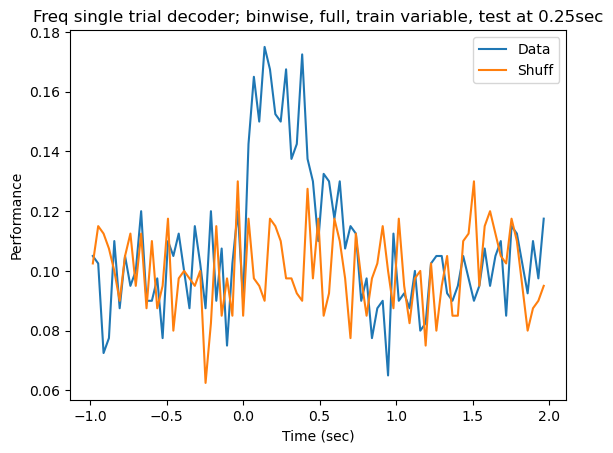

In [8]:
# ---- plotting full decoder results ----
figs_full = f_plot_binwise_dec(dec_data_full, plot_t=plot_t, plot_legend=plot_legend, plot_start=-1, plot_end=2, fixed_time=0.25, title_tag='Freq single trial decoder')
if save_figs:    
    f_save_fig(figs_full['full'][0], path=fig_dir, name_tag='data')
    f_save_fig(figs_full['full'][1], path=fig_dir, name_tag='shuff')